# Rent vs. Buy

Author: Arun Manohar

Email: arunmano121@outlook.com

License: BSD-3-Clause

Compares the scenario of buying vs renting given certain parameters.

The parameters that are involved in calculating the monthly parameters are home value, down payment, loan term, interest rate, monthly HOA, maintenance, property tax and home insurance (which are based on the property tax rates).

Other parameters involved in modeling are rent appreciation, property appreciation, investment returns, tax bracket, number of years, etc.

In [2]:
# import necessary libraries
# import numpy modules
import numpy as np
# plotting tools
import matplotlib.pyplot as plt
# writing to excel
import xlsxwriter

In [3]:
# write to excel

def write_to_excel(params):
    '''
    Writes the monthly buying and renting schedule into excel

    Parameters
    ----------
    params: dictionary
        contains all the monthly quantities

    Returns
    -------
    None
    '''

    print('\n' + '-'*50)
    print('Writing to excel file - rent_vs_buy.xlsx')
    print('-'*50)

    # file name to write out
    workbook = xlsxwriter.Workbook('rent_vs_buy.xlsx')
    worksheet = workbook.add_worksheet()

    # setting up necessary formats
    fmt = workbook.add_format({'bold': True})
    money = workbook.add_format({'num_format': '[$$]#,##0.00'})

    worksheet.write(0, 0, 'Home val.', fmt)
    worksheet.write(0, 1, params['home_val'], money)
    worksheet.write(1, 0, 'Down pay.', fmt)
    worksheet.write(1, 1, params['down_pay'], money)
    worksheet.write(2, 0, 'Loan amt.', fmt)
    worksheet.write(2, 1, params['loan_amt'], money)
    worksheet.write(3, 0, 'Rent', fmt)
    worksheet.write(3, 1, params['rent'], money)

    # write out headers using format
    worksheet.write(0+6, 1, 'Buying', fmt)
    worksheet.write(0+6, 2, 'Buying', fmt)
    worksheet.write(0+6, 3, 'Buying', fmt)
    worksheet.write(0+6, 4, 'Buying', fmt)
    worksheet.write(0+6, 5, 'Buying', fmt)
    worksheet.write(0+6, 6, 'Buying', fmt)
    worksheet.write(0+6, 7, 'Buying', fmt)
    worksheet.write(0+6, 8, 'Buying', fmt)
    worksheet.write(0+6, 9, 'Buying', fmt)
    worksheet.write(0+6, 10, 'Buying', fmt)
    worksheet.write(0+6, 11, 'Buying', fmt)
    worksheet.write(0+6, 12, 'Buying', fmt)
    worksheet.write(0+6, 13, 'Renting', fmt)
    worksheet.write(0+6, 14, 'Renting', fmt)
    worksheet.write(0+6, 15, 'Renting', fmt)

    worksheet.write(1+6, 0, 'Month', fmt)
    worksheet.write(1+6, 1, 'Home value', fmt)
    worksheet.write(1+6, 2, 'Interest', fmt)
    worksheet.write(1+6, 3, 'Principal', fmt)
    worksheet.write(1+6, 4, 'Out. principal', fmt)
    worksheet.write(1+6, 5, 'Prop. tax', fmt)
    worksheet.write(1+6, 6, 'HOA', fmt)
    worksheet.write(1+6, 7, 'Tax break', fmt)
    worksheet.write(1+6, 8, 'Maintenance', fmt)
    worksheet.write(1+6, 9, 'Home ins', fmt)
    worksheet.write(1+6, 10, 'Cash outflow', fmt)
    worksheet.write(1+6, 11, 'Net worth', fmt)
    worksheet.write(1+6, 12, 'Net worth after sell', fmt)
    worksheet.write(1+6, 13, 'Rent', fmt)
    worksheet.write(1+6, 14, 'Mon savings by renting', fmt)
    worksheet.write(1+6, 15, 'Net worth after investing', fmt)

    # write out individual lines of data
    for i in range(len(params['mon'])):
        worksheet.write(i + 8, 0, params['mon'][i])
        worksheet.write(i + 8, 1, params['mon_home_val'][i], money)
        worksheet.write(i + 8, 2, params['mon_int'][i], money)
        worksheet.write(i + 8, 3, params['mon_prin'][i], money)
        worksheet.write(i + 8, 4, params['mon_out_prin'][i], money)
        worksheet.write(i + 8, 5, params['mon_proptax'][i], money)
        worksheet.write(i + 8, 6, params['mon_hoa'][i], money)
        worksheet.write(i + 8, 7, params['mon_taxbrk'][i], money)
        worksheet.write(i + 8, 8, params['mon_maint'][i], money)
        worksheet.write(i + 8, 9, params['mon_homeins'][i], money)
        worksheet.write(i + 8, 10, params['mon_buy_outflow'][i], money)
        worksheet.write(i + 8, 11, params['mon_worth_buy'][i], money)
        worksheet.write(i + 8, 12, params['mon_worth_buy_sell'][i], money)
        worksheet.write(i + 8, 13, params['mon_rent'][i], money)
        worksheet.write(i + 8, 14, params['mon_savings_rent'][i], money)
        worksheet.write(i + 8, 15, params['mon_worth_rent'][i], money)

    # finished writing - close the workbook
    workbook.close()

    return


In [4]:
# plot net worth

def plot_net_worth(params):
    '''
    Plots net worth for the buying and renting scenarios given the parameters

    Parameters
    ----------
    params: dictionary
        contains all the monthly quantities

    Returns
    -------
    None
    '''

    print('\n' + '-'*50)
    print('Plotting net worth - rent vs buy')
    print('-'*50)

    # plot lines
    plt.plot(params['mon'], params['mon_worth_buy_sell'],
             label='Buying', linestyle='--')
    plt.plot(params['mon'], params['mon_worth_rent'],
             label='Renting', linestyle='-.')
    plt.ylabel('Net worth [$]')
    plt.xlabel('Months')
    plt.legend()
    plt.tight_layout()
    plt.show()

    return

In [5]:
# print monthly progression

def print_monthly(params):
    '''
    Prints monthly changes

    Parameters
    ----------
    params: dictionary
        contains all the monthly quantities

    Returns
    -------
    None
    '''

    print('-'*50)
    print('Before start of loan period!')
    print('Home value: $%0.2f' % (params['home_val']))
    print('Down payment: $%0.2f' % (params['down_pay']))
    print('Loan amount: $%0.2f' % (params['loan_amt']))
    print('Monthly rent: $%0.2f' % (params['rent']))

    # iterate through the time period on a monthly basis
    for month in range(len(params['mon'])):
        print('\n' + '-'*50)
        print('Month: %d' % (month+1))

        # home value
        print('Buying scenario - home value: $%0.2f'
              % (params['mon_home_val'][month]))

        # interest component of loan
        print('Buying scenario - interest on loan: $%0.2f'
              % (params['mon_int'][month]))

        # principal component of loan, and outstanding principal
        # rem_term is the months left in life of loan
        print('Buying scenario - principal on loan: $%0.2f'
              % (params['mon_prin'][month]))
        print('Buying scenario - outstanding principal: $%0.2f'
              % (params['mon_out_prin'][month]))

        # monthly property tax
        print('Buying scenario - propery tax: $%0.2f'
              % (params['mon_proptax'][month]))

        # monthly HOA
        print('Buying scenario - HOA: $%0.2f'
              % (params['mon_hoa'][month]))

        # monthly tax break based on mortgage interest and property tax
        print('Buying scenario - tax break: $%0.2f'
              % (params['mon_taxbrk'][month]))

        # monthly maintenance
        print('Buying scenario - maintenance: $%0.2f'
              % (params['mon_maint'][month]))

        # monthly home insurance - assuming home insurance is 10% of prop tax
        print('Buying scenario - home insurance: $%0.2f'
              % (params['mon_homeins'][month]))

        # monthly cash outflow to buy a home
        print('Buying scenario - cash outflow: $%0.2f'
              % (params['mon_buy_outflow'][month]))

        # monthly net worth if buying is the difference between home value
        # outstanding principal
        print('Buying scenario - net worth: $%0.2f'
              % (params['mon_worth_buy'][month]))

        # monthly net worth if owning home and selling
        # based on 6% realtor fees
        print('Buying scenario - net worth after selling home: $%0.2f' %
              (params['mon_worth_buy_sell'][month]))

        # renting scenario
        # rent
        print('Renting scenario - rent: $%0.2f'
              % (params['mon_rent'][month]))

        # monthly cash savings by renting
        print('Renting scenario - monthly cash savings: $%0.2f'
              % (params['mon_savings_rent'][month]))

        # monthly net worth by renting and investing
        print('Renting scenario - net worth after investing: $%0.2f'
              % (params['mon_worth_rent'][month]))

    return


In [6]:
# calculate parameters

def calc_params(params):
    '''
    Calculate monthly changes and store in arrays

    Parameters
    ----------
    params: dictionary
        contains all the placeholders for the intermediate and final arrays

    Returns
    -------
    params: dictionary
        contains the monthly computations of the different entities
    '''

    # iterate through the time period on a monthly basis
    for month in range(len(params['mon'])):

        # home value
        if month == 0:
            # in the first month, use the purchase price for home value
            params['mon_home_val'][month] = \
                (1 + params['mon_home_appr'][month]/100) * \
                params['home_val']
        else:
            # use the previous month home value
            params['mon_home_val'][month] = \
                (1 + params['mon_home_appr'][month]/100) \
                * params['mon_home_val'][month-1]

        # interest component of loan
        if month == 0:
            # in the first month, the interest is based on loan amount
            params['mon_int'][month] = \
                params['mon_int_rate'][month]/100 * params['loan_amt']
        else:
            # use the previous months outstanding principal
            params['mon_int'][month] = \
                params['mon_int_rate'][month]/100 * \
                params['mon_out_prin'][month-1]

        # principal component of loan, and outstanding principal
        # rem_term is the months left in life of loan
        rem_term = params['loan_term'] * 12 - month
        if month == 0:
            # in the first month, the principal is based on loan amount
            params['mon_prin'][month] = params['loan_amt'] * \
                params['mon_int_rate'][month]/100 / \
                (1 - (1 + params['mon_int_rate'][month]/100)
                 ** (-rem_term)) \
                - params['mon_int'][month]

            params['mon_out_prin'][month] = params['loan_amt'] - \
                params['mon_prin'][month]
        else:
            # use the previous months outstanding principal
            params['mon_prin'][month] = \
                params['mon_out_prin'][month-1] * \
                params['mon_int_rate'][month] / 100 /\
                (1 - (1 + params['mon_int_rate'][month]/100)
                 ** (-rem_term)) \
                - params['mon_int'][month]

            params['mon_out_prin'][month] = \
                params['mon_out_prin'][month-1] - \
                params['mon_prin'][month]

        # monthly property tax
        if month == 0:
            # in the first month, the property tax is based on home price
            params['mon_proptax'][month] = params['prop_tax'] / (12*100)\
                * params['home_val']
        else:
            # use the previous months home value
            params['mon_proptax'][month] = params['prop_tax'] / (12*100)\
                * params['mon_home_val'][month-1]

        # monthly HOA
        params['mon_hoa'][month] = params['hoa']

        # monthly tax break based on mortgage interest and property tax
        params['mon_taxbrk'][month] = params['tax_bkt'] / 100 * \
            (params['mon_proptax'][month] + params['mon_int'][month])

        # monthly maintenance
        params['mon_maint'][month] = params['maint']

        # monthly home insurance - assuming home insurance is 10% of prop tax
        params['mon_homeins'][month] = \
            params['mon_proptax'][month]/10

        # monthly cash outflow to buy a home
        params['mon_buy_outflow'][month] = \
            params['mon_prin'][month] + \
            params['mon_int'][month] + \
            params['mon_proptax'][month] + \
            params['mon_hoa'][month] + \
            params['mon_homeins'][month] + \
            params['mon_maint'][month] - \
            params['mon_taxbrk'][month]

        # monthly net worth if buying is the difference between home value
        # outstanding principal
        params['mon_worth_buy'][month] = \
            params['mon_home_val'][month] - \
            params['mon_out_prin'][month]

        # monthly net worth if owning home and selling
        # based on 6% realtor fees
        params['mon_worth_buy_sell'][month] = \
            params['mon_worth_buy'][month] - \
            0.06 * params['mon_home_val'][month]

        # renting scenario
        # rent
        if month == 0:
            params['mon_rent'][month] = params['rent']
        else:
            params['mon_rent'][month] = \
                (1 + params['mon_rent_appr'][month] / 100) * \
                params['mon_rent'][month-1]

        # monthly cash savings by renting
        params['mon_savings_rent'][month] = \
            params['mon_buy_outflow'][month] - \
            params['mon_rent'][month]

        # monthly net worth by renting and investing
        if month == 0:
            params['mon_worth_rent'][month] = \
                (1 + params['mon_inv_ret'][month] / 100) * \
                params['down_pay']
        else:
            params['mon_worth_rent'][month] = \
                params['mon_savings_rent'][month] + \
                (1 + params['mon_inv_ret'][month]/100) * \
                (params['mon_worth_rent'][month-1])

    return params

In [7]:
# initialize parameters

def init_params(params):
    '''
    Initialize parameters and arrays that are required to compute monthly
    changes

    Parameters
    ----------
    params: dictionary
        contains all the placeholders for the intermediate and final arrays

    Returns
    -------
    params: dictionary
        contains all the initialized placeholders for the intermediate
        and final arrays
    '''

    # range of months to model on
    params['mon'] = np.array([i+1 for i in range(12 * params['yrs'])])

    # monthly home price appreciation is annual divided by 12
    params['mon_home_appr'] = np.array(params['home_appr']
                                       [(params['mon']-1)//12]/12)

    # monthly rent appreciation is annual divided by 12
    params['mon_rent_appr'] = np.array(params['rent_appr']
                                       [(params['mon']-1)//12]/12)

    # monthly interest rate is annual divided by 12
    params['mon_int_rate'] = np.array(params['int_rate']
                                      [(params['mon']-1)//12]/12)

    # monthly investment return is annual divided by 12
    params['mon_inv_ret'] = np.array(params['inv_ret']
                                     [(params['mon']-1)//12]/12)

    # initialize empty array to hold monthly values
    # monthly home value
    params['mon_home_val'] = np.zeros(params['mon'].shape)
    # principal paid each month
    params['mon_prin'] = np.zeros(params['mon'].shape)
    # outstanding principal after each month
    params['mon_out_prin'] = np.zeros(params['mon'].shape)
    # monthly interest
    params['mon_int'] = np.zeros(params['mon'].shape)
    # monthly property tax
    params['mon_proptax'] = np.zeros(params['mon'].shape)
    # monthly HOA
    params['mon_hoa'] = np.zeros(params['mon'].shape)
    # monthly tax break
    params['mon_taxbrk'] = np.zeros(params['mon'].shape)
    # monthly home insurance
    params['mon_homeins'] = np.zeros(params['mon'].shape)
    # monthly maintenance
    params['mon_maint'] = np.zeros(params['mon'].shape)
    # monthly net outflow if buying
    params['mon_buy_outflow'] = np.zeros(params['mon'].shape)
    # monthly net worth if buying
    params['mon_worth_buy'] = np.zeros(params['mon'].shape)
    # monthly net worth if buying and factoring cost to sell
    params['mon_worth_buy_sell'] = np.zeros(params['mon'].shape)
    # monthly rent
    params['mon_rent'] = np.zeros(params['mon'].shape)
    # monthly savings if renting
    params['mon_savings_rent'] = np.zeros(params['mon'].shape)
    # monthly net worth if renting and investing
    params['mon_worth_rent'] = np.zeros(params['mon'].shape)

    return params



In [8]:
# ensure valid inputs

def get_valid_input(disp_text, yrs):
    '''
    setup a loop to make sure entities are valid, either fixed with
    length 1 or match length of modeling period.

    Parameters
    ----------
    disp_text: str
        display text
    yrs: int
        number of years to simulate

    Returns
    -------
    inp: list of float
        list of validated inputs
    '''
    while True:
        try:
            # input statement
            msg = 'Enter ' + disp_text + ' (%): '
            inp = np.array(input(msg).strip(' []()').split(','))

            # if length is not equal to yrs, or fixed, then ask to re-enter
            j_len = len(inp)
            if j_len == yrs or j_len == 1:
                # if fixed rate, repeat the entry to match yrs
                if j_len == 1:
                    inp = np.repeat(inp[0], yrs)
                # convert to float from string for further operations
                inp = inp.astype(float)
                break
            print('You entered %d entries! Enter %d entries, '
                  'or 1 entry to denote fixed!' % (j_len, yrs))
        except Exception as e:
            print(e)

    return inp


In [9]:
# get user inputs

def get_user_input():
    '''
    Get a variety of user inputs to simulate the scenario of buying vs
    renting a similar property.

    Parameters
    ----------
    None:
        No input arguments

    Returns
    -------
    params: dictionary
        dictionary containing different parameters that serve as inputs for
        simulating buying vs renting
    '''

    params = {}

    # home value
    while True:
        try:
            # get input
            inp = input('Home value : ')
            mod = float(inp.strip(' kK$%Mm,'))

            # check to see if home value is in 1000's
            if 'k' in inp or 'K' in inp:
                params['home_val'] = mod * 1000

            # check to see if home value is in 1000000's
            elif 'm' in inp or 'M' in inp:
                params['home_val'] = mod * 1000000

            # else home value is as listed
            else:
                params['home_val'] = mod
            break

        except Exception as e:
            print(e)
            print('Enter as 100000 or $10,000 or $100K or 100K')

    # downpayment - typically less than 30% of home value or amount
    while True:
        try:
            # get input
            inp = input('Down-payment (% or $): ')
            mod = float(inp.strip(' kK$%Mm,'))

            # check to see if downpayment is in 1000's
            if 'k' in inp or 'K' in inp:
                params['down_pay'] = mod * 1000

            # check to see if downpayment is in 1000000's
            elif 'm' in inp or 'M' in inp:
                params['down_pay'] = mod * 1000000

            # check to see if is listed in percentage or less than 100
            elif '%' in inp or mod <= 100:
                params['down_pct'] = mod
                params['down_pay'] = params['home_val'] * \
                    params['down_pct']/100

            # else downpayment is as listed
            else:
                params['down_pay'] = mod
            break

        except Exception as e:
            print(e)
            print('Enter as 10000 or $10,000 or $10K or 10K or 10%')

    # loan amount is home value minus down payment
    params['loan_amt'] = params['home_val'] - params['down_pay']

    # loan term
    params['loan_term'] = int(input('Loan term (years): '))

    # Monthly HOA and Mello-Roos
    params['hoa'] = int(input('Monthly HOA and Mello-Roos ($): '))

    # Monthly maintenance
    params['maint'] = int(input('Monthly maintenance ($): '))

    # monthly property tax - typically around 1.25% in San Diego, CA area
    params['prop_tax'] = float(input('Enter property tax percentage (%): '))

    # Approximate tax bracket (property tax and mortgage insurance are
    # tax deductible)
    params['tax_bkt'] = int(input('Enter approximate tax bracket (%): '))

    # cost to rent
    params['rent'] = int(input('Enter cost to rent ($): '))

    # Years to model
    params['yrs'] = int(input('Years to model: '))

    # Annual interest rate
    params['int_rate'] = get_valid_input('annual interest rate',
                                         params['yrs'])

    # Annual home price appreciation
    params['home_appr'] = get_valid_input('annual home appreciation',
                                          params['yrs'])

    # Annual rent price appreciation
    params['rent_appr'] = get_valid_input('annual rent appreciation',
                                          params['yrs'])

    # Investment returns
    params['inv_ret'] = get_valid_input('annual investment returns',
                                        params['yrs'])

    return params


Home value :  1.2m
Down-payment (% or $):  300k
Loan term (years):  30
Monthly HOA and Mello-Roos ($):  0
Monthly maintenance ($):  500
Enter property tax percentage (%):  1.12
Enter approximate tax bracket (%):  25
Enter cost to rent ($):  2500
Years to model:  10
Enter annual interest rate (%):  7
Enter annual home appreciation (%):  2
Enter annual rent appreciation (%):  2
Enter annual investment returns (%):  5


--------------------------------------------------
Before start of loan period!
Home value: $1200000.00
Down payment: $300000.00
Loan amount: $900000.00
Monthly rent: $2500.00

--------------------------------------------------
Month: 1
Buying scenario - home value: $1202000.00
Buying scenario - interest on loan: $5250.00
Buying scenario - principal on loan: $737.72
Buying scenario - outstanding principal: $899262.28
Buying scenario - propery tax: $1120.00
Buying scenario - HOA: $0.00
Buying scenario - tax break: $1592.50
Buying scenario - maintenance: $500.00
Buying scenario - home insurance: $112.00
Buying scenario - cash outflow: $6127.22
Buying scenario - net worth: $302737.72
Buying scenario - net worth after selling home: $230617.72
Renting scenario - rent: $2500.00
Renting scenario - monthly cash savings: $3627.22
Renting scenario - net worth after investing: $301250.00

--------------------------------------------------
Month: 2
Buying scenario - home value: $1204003.33
Buying 

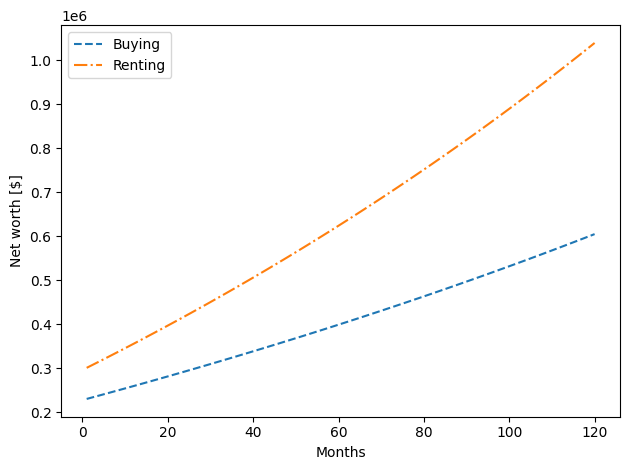


--------------------------------------------------
Writing to excel file - rent_vs_buy.xlsx
--------------------------------------------------


In [10]:
# main section that drives other functions

# collect user input of the parameters
params = get_user_input()

# initialize the necessary arrays based on input parameters
params = init_params(params)

# calculate monthly updates
params = calc_params(params)

# print monthly updates
print_monthly(params)

# plot net worth in both scenarios
plot_net_worth(params)

# write monthly schedule into excel sheet
write_to_excel(params)